## Apply TF-IDF to the Inaugural Corpus 

1. Define or augment a set of stopwords for this problem
2. Construct a document-by-term matrix (documents will be rows, terms will be columns), along with a vocabulary while controlling for stopwords
3. Write functions to comput TF-IDF and apply those to the document-by-term matrix
4. Find the closest historic inaugural address to the 2017 address by President Trump
5. Learn to use the PCA transformation and plot the inaugural address along the first two principal components

In [1]:
import re
import math
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import inaugural
from string import punctuation
from nltk import word_tokenize
import string

In [2]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

porter    = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
wnl       = nltk.WordNetLemmatizer()

In [3]:
inaugural.fileids()[:4]

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt']

In [4]:
inaugural.words(inaugural.fileids()[0])

['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', ...]

In [5]:
stop_words = set(stopwords.words('english'))

### 1. Stopwords
Remove all punctuation

In [6]:
punc = [".",']',"),",",",'[',"-",":","?","\"","\'","!","--",'?"','";',"(",")",'....',";","\x80\x90", '''"?''',',"','."','.)', '"?', ',"','.)', '...', '000']  
stop_words.update(punc)

---
### 2. Read each inaugural address into an Pandas DataFrame

**2.1 Create a vocabulary as a set of all unique stemmed terms in the corpus**

In [7]:
# Remove all strange unicode characters
unicode = []
for i in range(58):
    for word in inaugural.words(inaugural.fileids()[i]):
        for c in list(word):
            if ord(c) > 127:
                unicode.append(word)
stop_words.update(unicode)

In [8]:
len(stop_words)

225

In [9]:
vocab = set()

In [10]:
for i in range(58):
    for j in inaugural.words(inaugural.fileids()[i]):
        if j.lower() not in stop_words:
            vocab.add(porter.stem(j.lower()))

In [11]:
len(vocab)

5395

**2.2 Use the vocabulary now to read each inaugural address into a dataframe**

Each row of the dataframe should represent a document (one of the addresses). 

In [13]:
df = pd.DataFrame()
# Each row of the dataframe represents a document (inaugural address)
# Each column of the dataframe is a term from the vocab

myList=[]
for i in range(58):
    wordfreq = {}
    for word in inaugural.words(inaugural.fileids()[i]):
        if word.lower() in vocab:
            if word.lower() in wordfreq:
                wordfreq[word.lower()] += 1
            else:
                wordfreq[word.lower()] = 1
    myList.append(wordfreq)

df = df.append(myList, ignore_index=True)

In [14]:
df = df.fillna(0)

In [15]:
df

,fellow,and,among,incident,life,event,could,greater,order,14th,...,sad,disrepair,hire,shine,bedrock,brown,bleed,urban,sprawl,windswept
0,3.0,48,1.0,1.0,1.0,2.0,3.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,130,4.0,0.0,2.0,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,81,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.0,93,7.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,43,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,44,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,122,3.0,2.0,1.0,3.0,1.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.0,141,1.0,0.0,2.0,1.0,6.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3.0,116,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
len(inaugural.fileids())

58

---
### 3. Compute TF-IDF for the document-term matrix ###

**3.1. A function that computes term frequency (TF) for each document**

In [17]:
# compute term frequency
# inputs: wordvec is a series that contains, for a given doc, 
#                 the word counts for each term in the vocab
#         doclen  is the length of the document
# returns: a series with new term-frequencies (raw counts divided by doc length)

def computetf(wordvec,doclen):
    tf = []
    for i in wordvec:
        j = i/doclen
        tf.append(j)
    return tf

**3.2 A function that computes inverse document frequency**

In [18]:
import math 

# input:   document-by-term (row-by-column) dataframe
# returns: dictionary of key-value pairs. Keys are terms in the vocab, values are IDF.

def computeidf(df):
    idf = {}
    N = len(df.row)
    for word, doc in df.items():
        freq=0
        for i in doc:
            if i>0:
                freq += 1
        idf[word] = math.log(N/freq)
    return idf

**Create a new dataframe and populate it with the TF-IDF values for each document-term combination**

The functions above will work with the below code snippet.

In [19]:
newdf = pd.DataFrame()

idfdict = computeidf(df)

cols = df.columns
for index, row in df.iterrows():
    dict={}
    newrow = computetf(row,len(inaugural.words(inaugural.fileids()[index])))
    for c in range(len(cols)):
        dict[cols[c]] = newrow[c]*idfdict[cols[c]]
    newdf = newdf.append(dict, ignore_index=True)

In [20]:
newdf.shape

(58, 2594)

---
### 4. Using TF-IDF values, find and rank order the 3 closest inaugural addresses to Donald Trump's 2017 address, measured by cosine similarity

In [21]:
# President Trump's address is 57 (0-indexed)
inaugural.fileids()[-1]
newdf.iloc[57,:].head(100)

$           0.000000
1           0.000000
100         0.000000
120         0.000000
125         0.000000
              ...   
accustom    0.000000
acquit      0.000000
across      0.003994
act         0.000000
action      0.000779
Name: 57, Length: 100, dtype: float64

**4.1 Create an array called dist that contains the cosine similarity distance between the 2017 inaugural address (called d1 below) and each of the inaugural addresses**

In [22]:
from numpy import dot
from numpy.linalg import norm

In [23]:
d1 = newdf.iloc[57,:]
dist = []
for index,row in newdf.iterrows():
    cos_sim = dot(d1, newdf.iloc[index])/(norm(d1)*norm(newdf.iloc[index]))
    dist.append(cos_sim)

In [24]:
cos_dist = pd.DataFrame(dist)

In [25]:
cos_dist['address'] = inaugural.fileids()

In [26]:
cos_dist.columns = ['cos_dist', 'address']

In [27]:
cos_dist.sort_values(by='cos_dist',ascending=False)

,cos_dist,address
57,1.000000,2017-Trump.txt
51,0.234299,1993-Clinton.txt
50,0.216729,1989-Bush.txt
55,0.206770,2009-Obama.txt
52,0.193580,1997-Clinton.txt
53,0.191411,2001-Bush.txt
45,0.189996,1969-Nixon.txt
48,0.188416,1981-Reagan.txt
56,0.174315,2013-Obama.txt
46,0.170520,1973-Nixon.txt


**4.2 The 3 closest associated inaugural address, when measured by cosign similarity.**

2017-Trump.txt (closest if included)
1993-Clinton.txt (closest if 2017-Trump.txt is not included)
1989-Bush.txt
2009-Obama.txt

**4.3 Explanation/understanding of why these documents are "close" to the 2017 inaugural address.**

It makes sense that 2017-Trump.txt has the closest cosine similarity distance to the 2017 inaugural address because they are the same document. If we don't include 2017-Trump.txt itself, then 1993-Clinton.txt has the closest cosine similarity distance to 1993-Clinton.txt. 
Since cosine similarity measures how similar the documents are irrespective of their size, a cosine similarity distance of 0.234299	between 1993-Clinton.txt and 2017-Trump.txt means that about 23.43% of those two documents are similar to each other. A cosine similarity distance of 0.216729 between 1989-Bush.txt and 2017-Trump.txt means that about 21.67% of those two documents are similar to each other. A cosine similarity distance of 0.206770 between 2009-Obama.txt and 2017-Trump.txt means that about 20.68% of those two documents are similar to each other.

---
### 5. Compute the first two principal components of the TF-IDF matrix, and plot each document along each of the PCA components

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [29]:
# The result is X, an array of 2-element arrays
X=PCA(n_components=2).fit(newdf).transform(newdf)

In [30]:
len(X)

58

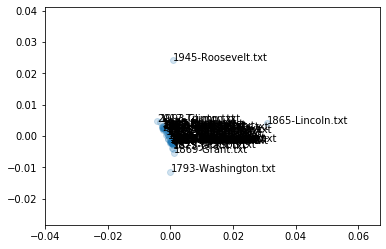

In [31]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.axis('equal');
for i in range(0,58):
    plt.text(X[i,0],X[i,1],inaugural.fileids()[i])

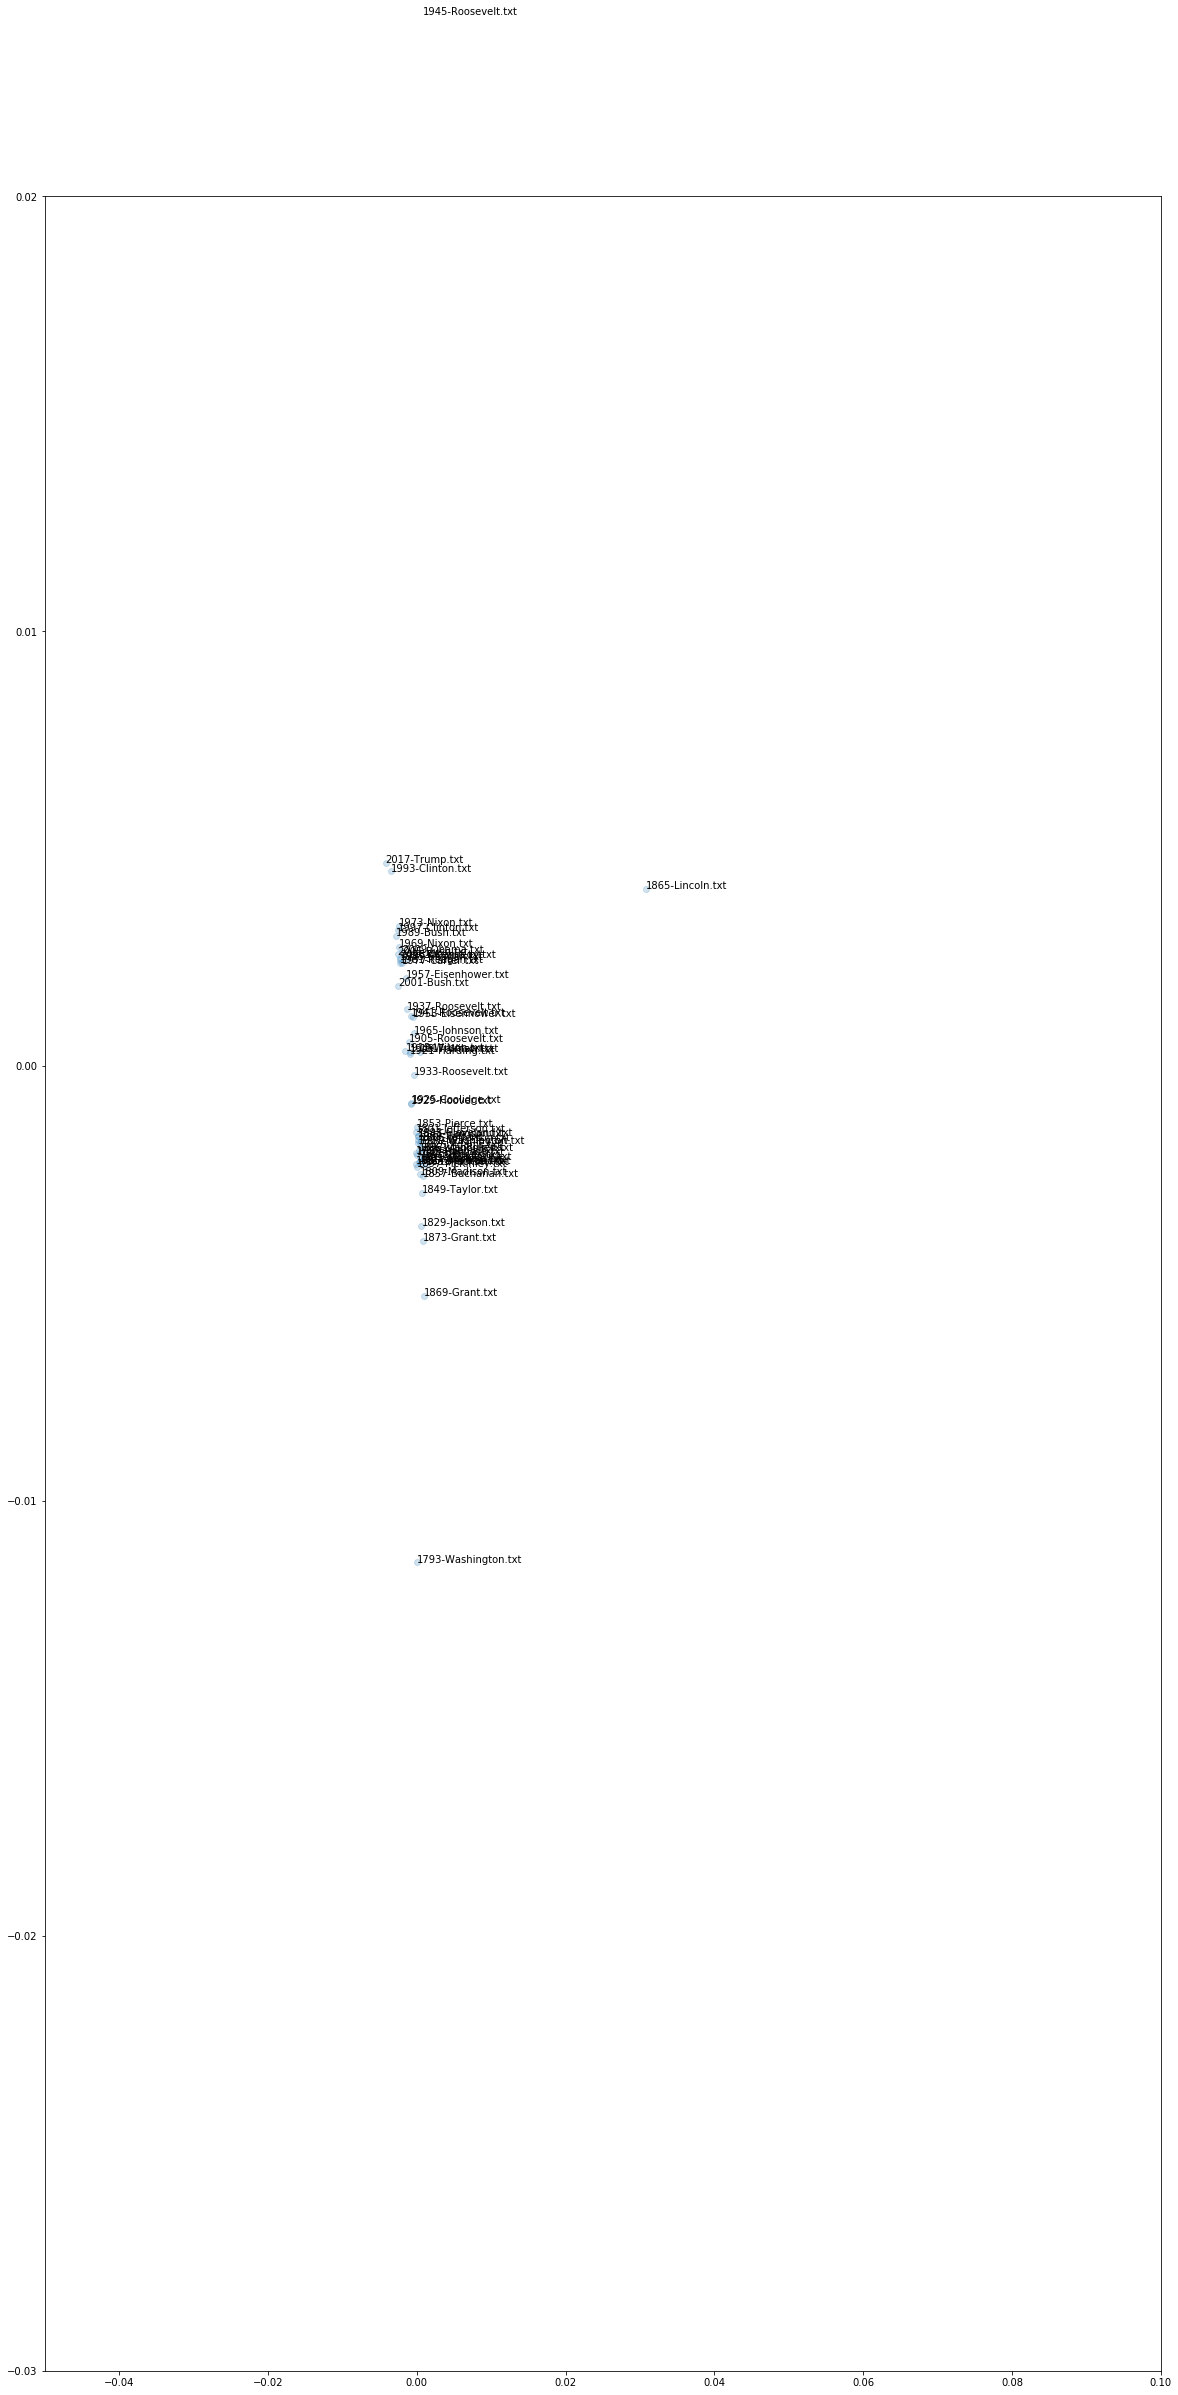

In [32]:
plt.figure(figsize=(20,40))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.xlim([-0.05,0.1])
plt.ylim([-0.03, 0.02])
for i in range(0,58):
    plt.text(X[i,0],X[i,1],inaugural.fileids()[i])
plt.savefig('pca.png')